<a href="https://colab.research.google.com/github/Manojpatil123/self-project/blob/main/Self_Project_Insurance_Decisioning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> <u>Problem Statement</u></b>

### Picture this. You are a data scientist in a start-up culture with the potential to have a very large impact on the business. Oh, and you are backed up by a company with 140 years' business experience.

### Curious? Great! You are the kind of person we are looking for.

### Prudential, one of the largest issuers of life insurance in the USA, is hiring passionate data scientists to join a newly-formed Data Science group solving complex challenges and identifying opportunities. The results have been impressive so far but they want more. 

### In a one-click shopping world with on-demand everything, the life insurance application process is antiquated. Customers provide extensive information to identify risk classification and eligibility, including scheduling medical exams, a process that takes an average of 30 days.

### The result? People are turned off. That’s why only 40% of U.S. households own individual life insurance. Prudential wants to make it quicker and less labor intensive for new and existing customers to get a quote while maintaining privacy boundaries.

### By developing a predictive model that accurately classifies risk using a more automated approach, you can greatly impact public perception of the industry.

### The results will help Prudential better understand the predictive power of the data points in the existing assessment, enabling them to significantly streamline the process.

## <b>In this self project, you are required to do </b>

* ### Perform exploratory data analysis
* ### Build logistic regression, random forest, gradient boosted decision trees and xgboost models
* ### Evaluate the performance of the models using different set of metrics and prepare a final dataframe containing the train and test metrics for each of the models

## <b>Some of the guidelines for the project :</b>
* ### Describe in detail each of the experiments 
* ### Include plots and charts
* ### Draw the final conclusion on the basis of comparison of different models. 

# <b><u>Variable Description 

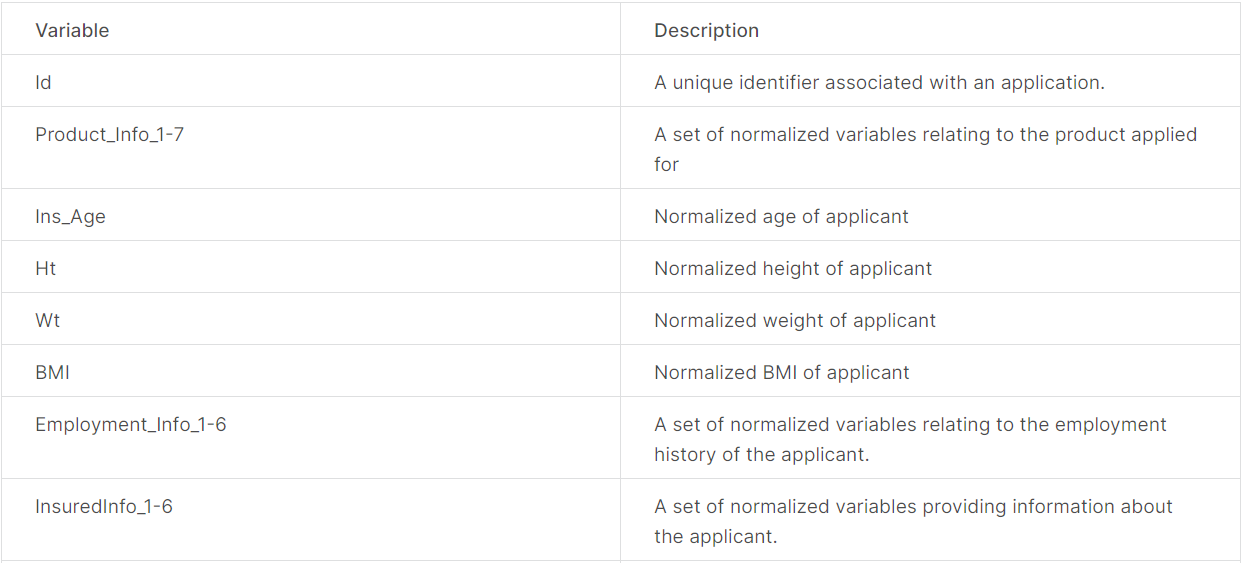

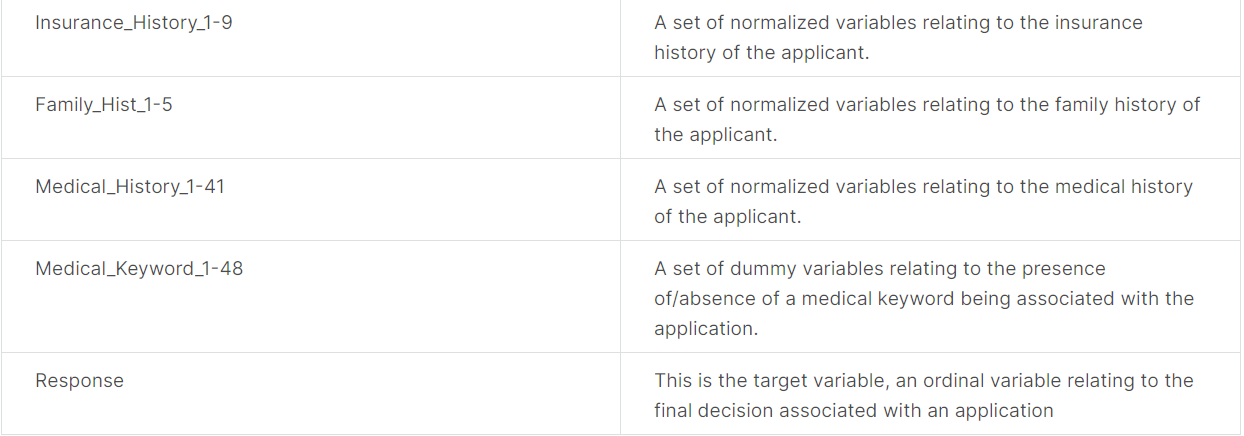

In [4]:
!pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100 kB 3.3 MB/s 


In [70]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from skopt import BayesSearchCV
from sklearn.model_selection import RandomizedSearchCV
from skopt.space import Real, Categorical, Integer
%matplotlib inline


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
df_train=pd.read_csv("/content/drive/MyDrive/Alma better/Alma better/module 4/week 2/18 06 22 guided project/train.csv")
df_test=pd.read_csv("/content/drive/MyDrive/Alma better/Alma better/module 4/week 2/18 06 22 guided project/test.csv")

In [8]:
df_train.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,0,0,0,0,0,0,0,8


In [9]:
df_test.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48
0,1,1,D3,26,0.487179,2,3,1,0.611940,0.781818,...,0,0,0,0,0,0,0,0,0,0
1,3,1,A2,26,0.076923,2,3,1,0.626866,0.727273,...,0,0,0,0,0,0,0,0,0,0
2,4,1,D3,26,0.144667,2,3,1,0.582090,0.709091,...,0,0,0,0,0,0,0,0,0,0
3,9,1,A1,26,0.151709,2,1,1,0.522388,0.654545,...,0,0,0,0,0,0,0,0,1,1
4,12,1,A1,26,0.076923,2,3,1,0.298507,0.672727,...,0,0,0,0,0,0,0,0,0,0


In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Columns: 128 entries, Id to Response
dtypes: float64(18), int64(109), object(1)
memory usage: 58.0+ MB


In [11]:
df_train.columns

Index(['Id', 'Product_Info_1', 'Product_Info_2', 'Product_Info_3',
       'Product_Info_4', 'Product_Info_5', 'Product_Info_6', 'Product_Info_7',
       'Ins_Age', 'Ht',
       ...
       'Medical_Keyword_40', 'Medical_Keyword_41', 'Medical_Keyword_42',
       'Medical_Keyword_43', 'Medical_Keyword_44', 'Medical_Keyword_45',
       'Medical_Keyword_46', 'Medical_Keyword_47', 'Medical_Keyword_48',
       'Response'],
      dtype='object', length=128)

In [12]:
df_train.describe(include='all')

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
count,59381.000000,59381.000000,59381,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,...,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000
unique,NaN,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,D3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,14321,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,39507.211515,1.026355,NaN,24.415655,0.328952,2.006955,2.673599,1.043583,0.405567,0.707283,...,0.056954,0.010054,0.045536,0.010710,0.007528,0.013691,0.008488,0.019905,0.054496,5.636837
std,22815.883089,0.160191,NaN,5.072885,0.282562,0.083107,0.739103,0.291949,0.197190,0.074239,...,0.231757,0.099764,0.208479,0.102937,0.086436,0.116207,0.091737,0.139676,0.226995,2.456833
min,2.000000,1.000000,NaN,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,19780.000000,1.000000,NaN,26.000000,0.076923,2.000000,3.000000,1.000000,0.238806,0.654545,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,39487.000000,1.000000,NaN,26.000000,0.230769,2.000000,3.000000,1.000000,0.402985,0.709091,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
75%,59211.000000,1.000000,NaN,26.000000,0.487179,2.000000,3.000000,1.000000,0.567164,0.763636,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000


In [13]:
#id column is unique need to remove
df_train.drop("Id", inplace=True, axis=1)
df_test.drop("Id", inplace=True, axis=1)

In [14]:
df_train.shape

(59381, 127)

EDA

In [15]:
df_train.isnull().sum().sort_values(ascending=False)

Medical_History_10    58824
Medical_History_32    58274
Medical_History_24    55580
Medical_History_15    44596
Family_Hist_5         41811
                      ...  
Medical_History_7         0
Medical_History_6         0
Medical_History_5         0
Medical_History_4         0
Response                  0
Length: 127, dtype: int64

In [16]:
#removing columns having 0.4 pecentage of null values
df_train.isnull().sum()/len(df_train)
df_train.dropna(thresh=0.4*df_train.shape[0], axis=1, inplace=True)


In [17]:
df_train.isnull().sum().sort_values(ascending=False).head(10)

Family_Hist_3          34241
Family_Hist_2          28656
Insurance_History_5    25396
Family_Hist_4          19184
Employment_Info_6      10854
Medical_History_1       8889
Employment_Info_4       6779
Employment_Info_1         19
Medical_Keyword_15         0
Medical_Keyword_12         0
dtype: int64

In [18]:
#delaing with each null column
df_train.Family_Hist_3.head(20)

0     0.598039
1          NaN
2          NaN
3          NaN
4          NaN
5     0.294118
6          NaN
7     0.490196
8     0.529412
9          NaN
10    0.470588
11         NaN
12    0.549020
13         NaN
14    0.578431
15    0.549020
16         NaN
17    0.343137
18    0.509804
19         NaN
Name: Family_Hist_3, dtype: float64

In [19]:
#filling values with interpolate
df_train.Family_Hist_3=df_train.Family_Hist_3.interpolate()

In [20]:
df_train.Family_Hist_2=df_train.Family_Hist_2.mean()
df_train.Family_Hist_2.head(20)

0     0.47455
1     0.47455
2     0.47455
3     0.47455
4     0.47455
5     0.47455
6     0.47455
7     0.47455
8     0.47455
9     0.47455
10    0.47455
11    0.47455
12    0.47455
13    0.47455
14    0.47455
15    0.47455
16    0.47455
17    0.47455
18    0.47455
19    0.47455
Name: Family_Hist_2, dtype: float64

In [21]:
df_train.Insurance_History_5=df_train.Insurance_History_5.interpolate()
df_train.Insurance_History_5.head(20)

0     0.000667
1     0.000133
2     0.001350
3     0.002567
4     0.003783
5     0.005000
6     0.001667
7     0.000667
8     0.007613
9     0.000667
10    0.000587
11    0.000627
12    0.000667
13    0.002333
14    0.004000
15    0.000480
16    0.000453
17    0.000427
18    0.000400
19    0.000753
Name: Insurance_History_5, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


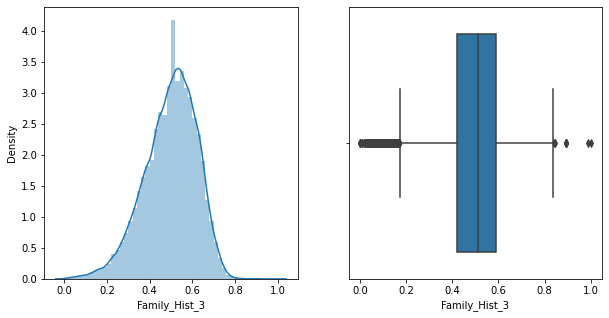

In [22]:
#checking plot of above three columns
fig, ax=plt.subplots(1,2,figsize=(10,5))
sns.distplot(df_train['Family_Hist_3'], ax=ax[0])
sns.boxplot(df_train['Family_Hist_3'], ax=ax[1])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


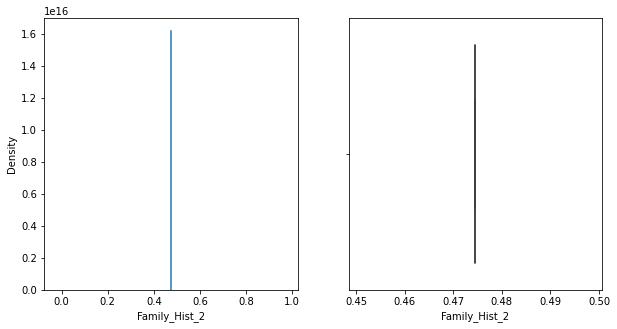

In [23]:
fig, ax=plt.subplots(1,2,figsize=(10,5))
sns.distplot(df_train['Family_Hist_2'], ax=ax[0])
sns.boxplot(df_train['Family_Hist_2'], ax=ax[1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


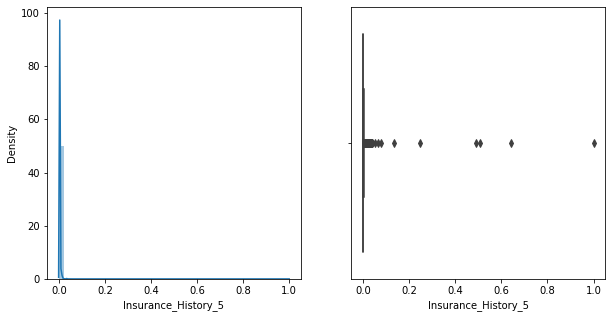

In [24]:
fig, ax=plt.subplots(1,2,figsize=(10,5))
sns.distplot(df_train['Insurance_History_5'], ax=ax[0])
sns.boxplot(df_train['Insurance_History_5'], ax=ax[1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


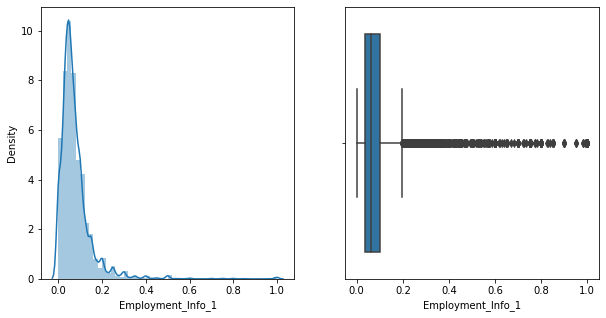

In [25]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.distplot(df_train['Employment_Info_1'], ax=axes[0])
sns.boxplot(df_train['Employment_Info_1'], ax=axes[1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


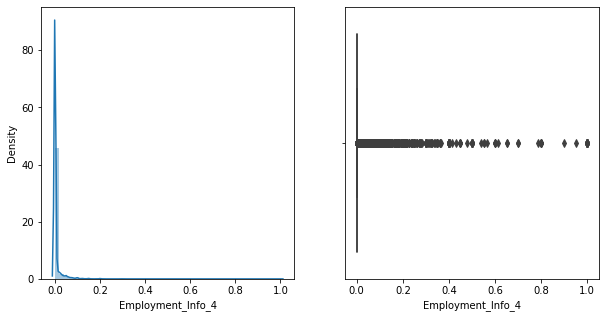

In [26]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.distplot(df_train['Employment_Info_4'], ax=axes[0])
sns.boxplot(df_train['Employment_Info_4'], ax=axes[1])

In [27]:
df_train['Employment_Info_1'] = df_train['Employment_Info_1'].fillna(df_train['Employment_Info_1'].median())
df_train['Employment_Info_4'] = df_train['Employment_Info_4'].fillna(df_train['Employment_Info_4'].median())
df_train['Employment_Info_6'] = df_train['Employment_Info_6'].fillna(df_train['Employment_Info_6'].mean())
df_train['Medical_History_1'] = df_train['Medical_History_1'].fillna(df_train['Medical_History_1'].median())
df_train['Family_Hist_4'] = df_train['Family_Hist_4'].fillna(df_train['Family_Hist_4'].mean())

In [28]:
df_train.isnull().sum().sort_values(ascending=False).head(10)

Product_Info_1        0
Medical_Keyword_19    0
Medical_Keyword_17    0
Medical_Keyword_16    0
Medical_Keyword_15    0
Medical_Keyword_14    0
Medical_Keyword_13    0
Medical_Keyword_12    0
Medical_Keyword_11    0
Medical_Keyword_10    0
dtype: int64

In [29]:
df_train.shape

(59381, 122)

removing columns that are not present in train set in test set

In [30]:
df_train_column=df_train.columns

In [31]:
df_test_column=df_test.columns

In [32]:
#delaing null values in test set
for i in df_test_column:
 if(i not in df_train_column):
   df_test.drop(i, axis=1, inplace =True)

In [33]:
df_test.shape

(19765, 121)

In [34]:
df_test.isnull().sum().sort_values(ascending=False).head(10)

Family_Hist_3          11064
Family_Hist_2           9880
Insurance_History_5     8105
Family_Hist_4           6677
Employment_Info_6       3787
Medical_History_1       2972
Employment_Info_4       2137
Employment_Info_1          3
Medical_Keyword_12         0
Medical_Keyword_13         0
dtype: int64

In [35]:
df_test['Employment_Info_1'] = df_test['Employment_Info_1'].fillna(df_test['Employment_Info_1'].median())
df_test['Employment_Info_4'] = df_test['Employment_Info_4'].fillna(df_test['Employment_Info_4'].median())
df_test['Employment_Info_6'] = df_test['Employment_Info_6'].fillna(df_test['Employment_Info_6'].mean())
df_test['Medical_History_1'] = df_test['Medical_History_1'].fillna(df_test['Medical_History_1'].median())
df_test['Family_Hist_4'] = df_test['Family_Hist_4'].fillna(df_test['Family_Hist_4'].mean())

In [36]:
df_test.Insurance_History_5=df_test.Insurance_History_5.mean()
df_test.Family_Hist_3  =df_test.Family_Hist_3.interpolate()
df_test.Family_Hist_2  =df_test.Family_Hist_2.mean()

In [37]:
df_test.isnull().sum().sort_values(ascending=False).head(10)

Product_Info_1        0
Medical_History_29    0
Medical_Keyword_17    0
Medical_Keyword_16    0
Medical_Keyword_15    0
Medical_Keyword_14    0
Medical_Keyword_13    0
Medical_Keyword_12    0
Medical_Keyword_11    0
Medical_Keyword_10    0
dtype: int64

In [38]:
#remove categorical feature
df_train = df_train.drop('Product_Info_2', axis=1)
df_test = df_test.drop('Product_Info_2', axis=1)

**Lets look at the numerical variables Age, Height, weight and BMI**

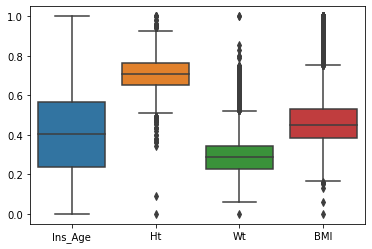

In [39]:
sns.boxplot(data=df_train[['Ins_Age','Ht','Wt','BMI']])

In [40]:
#removing outliers with z score
df_train=df_train[(np.abs(df_train['Wt'])-df_train['Wt'].mean())<=(3*df_train["Wt"].std())]
df_test=df_test[(np.abs(df_test['Wt'])-df_test['Wt'].mean())<=(3*df_test["Wt"].std())]
df_train=df_train[(np.abs(df_train['BMI'])-df_train['BMI'].mean())<=(3*df_train["BMI"].std())]
df_test=df_test[(np.abs(df_test['BMI'])-df_test['BMI'].mean())<=(3*df_test["BMI"].std())]
df_train=df_train[(np.abs(df_train['Ht'])-df_train['Ht'].mean())<=(3*df_train["Ht"].std())]
df_test=df_test[(np.abs(df_test['Ht'])-df_test['Ht'].mean())<=(3*df_test["Ht"].std())]

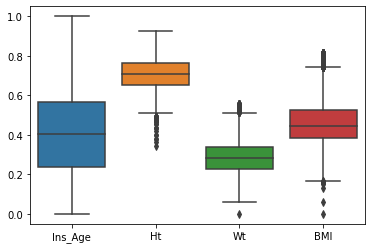

In [41]:
sns.boxplot(data=df_train[['Ins_Age','Ht','Wt','BMI']])

In [42]:
df_train.shape

(58326, 121)

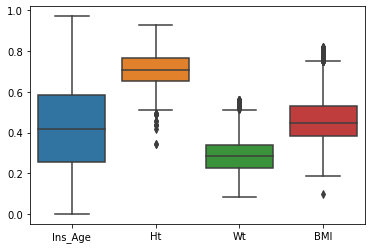

In [43]:
sns.boxplot(data=df_test[['Ins_Age','Ht','Wt','BMI']])

Target column

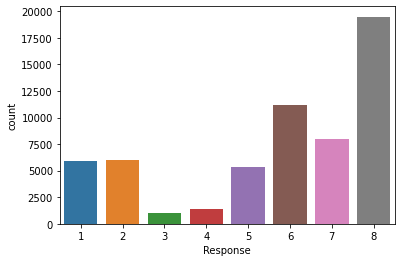

In [44]:
sns.countplot(x='Response',data=df_train)

In [45]:
df_train['Response'] = df_train['Response'].apply(lambda x : 1 if x==8 else 0)

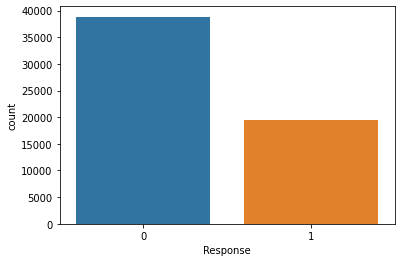

In [46]:
sns.countplot(x='Response',data=df_train)

In [47]:
df_train.head()

,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,1,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,...,0,0,0,0,0,0,0,0,0,1
1,1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,...,0,0,0,0,0,0,0,0,0,0
2,1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,...,0,0,0,0,0,0,0,0,0,1
3,1,10,0.487179,2,3,1,0.164179,0.672727,0.205021,0.352438,...,0,0,0,0,0,0,0,0,0,1
4,1,26,0.230769,2,3,1,0.417910,0.654545,0.234310,0.424046,...,0,0,0,0,0,0,0,0,0,1


splitting x and y

In [48]:
X, y = df_train.drop('Response',axis=1), df_train['Response']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=1)

**Now Lets implement 3 models on our dataset:**

1. **Logistic Regression**
2. **Random Forrest**
3. **XGBoost**
4. **gradient boosted decision trees**

In [82]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc,consensus_score

implementation of all algorithum

In [51]:
lr = LogisticRegression()
rf = RandomForestClassifier()
gdb=GradientBoostingClassifier()
xgb =XGBClassifier(objective= 'binary:logistic', nthread=4, seed=42)

In [52]:
param_dict_lr = {
    'C' : [1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100,1e-3,1e+4,1e+5,1e+6]
}

param_dict_rf = {
    'max_depth': [4, 6, 8],
    'min_samples_leaf': [40, 50],
    'min_samples_split': [50, 100, 150],
    'n_estimators': [50, 80, 100]
  }
param_dict_gdb={
    "loss":{'log_loss', 'deviance', 'exponential'},
    "criterion":{'friedman_mse', 'squared_error', 'mse'},
     'max_depth': [4, 6, 8],
    'min_samples_leaf': [40, 50],
    'min_samples_split': [50, 100, 150],
    'n_estimators': [50, 80, 100]
}

param_dict_xgb = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.05, 0.01, 0.005]
  }

logistic regression

In [53]:
lr_bayes = BayesSearchCV(estimator=lr,
                       search_spaces = {'C' : Real(1e-6, 1e+6, prior='log-uniform') },
                       cv = 5, verbose=2, scoring='roc_auc', n_iter=20)

lr_bayes.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END ...............................C=3715.7885812378104; total time=   4.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END ...............................C=3715.7885812378104; total time=   3.5s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END ...............................C=3715.7885812378104; total time=   4.5s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END ...............................C=3715.7885812378104; total time=   4.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END ...............................C=3715.7885812378104; total time=   4.4s
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END ...........................C=0.00029978850332824583; total time=   3.4s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END ...........................C=0.00029978850332824583; total time=   2.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END ...........................C=0.00029978850332824583; total time=   2.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END ...........................C=0.00029978850332824583; total time=   2.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END ...........................C=0.00029978850332824583; total time=   1.9s
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END ...............................C=142.27898993764393; total time=   1.9s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END ...............................C=142.27898993764393; total time=   1.7s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END ...............................C=142.27898993764393; total time=   1.8s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END ...............................C=142.27898993764393; total time=   1.8s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END ...............................C=142.27898993764393; total time=   1.8s
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END .................................C=947006.848606566; total time=   2.7s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END .................................C=947006.848606566; total time=   3.6s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END .................................C=947006.848606566; total time=   3.5s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END .................................C=947006.848606566; total time=   4.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END .................................C=947006.848606566; total time=   4.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ............................C=2.574605894859281e-06; total time=   3.4s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END ............................C=2.574605894859281e-06; total time=   2.4s
[CV] END ............................C=2.574605894859281e-06; total time=   1.4s
[CV] END ............................C=2.574605894859281e-06; total time=   1.5s
[CV] END ............................C=2.574605894859281e-06; total time=   1.6s
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END ...........................C=0.00025689784488347017; total time=   1.6s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END ...........................C=0.00025689784488347017; total time=   1.5s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END ...........................C=0.00025689784488347017; total time=   1.8s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END ...........................C=0.00025689784488347017; total time=   1.7s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END ...........................C=0.00025689784488347017; total time=   1.9s
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END ...............................C=147010.20978077292; total time=   1.9s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END ...............................C=147010.20978077292; total time=   1.7s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END ...............................C=147010.20978077292; total time=   1.7s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END ...............................C=147010.20978077292; total time=   2.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END ...............................C=147010.20978077292; total time=   2.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END ...............................C=237782.67247189075; total time=   2.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END ...............................C=237782.67247189075; total time=   2.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END ...............................C=237782.67247189075; total time=   1.9s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END ...............................C=237782.67247189075; total time=   2.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END ...............................C=237782.67247189075; total time=   1.9s
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END ...........................C=2.6106178675924686e-05; total time=   2.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END ...........................C=2.6106178675924686e-05; total time=   1.8s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END ...........................C=2.6106178675924686e-05; total time=   1.6s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END ...........................C=2.6106178675924686e-05; total time=   1.8s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END ...........................C=2.6106178675924686e-05; total time=   1.7s
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END .............................C=0.000135682684202354; total time=   1.8s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END .............................C=0.000135682684202354; total time=   1.9s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END .............................C=0.000135682684202354; total time=   1.8s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END .............................C=0.000135682684202354; total time=   1.9s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END .............................C=0.000135682684202354; total time=   2.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END .............................C=0.054435390854052704; total time=   1.9s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END .............................C=0.054435390854052704; total time=   2.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END .............................C=0.054435390854052704; total time=   2.4s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END .............................C=0.054435390854052704; total time=   1.9s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END .............................C=0.054435390854052704; total time=   1.9s
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END ...............................C=3.0543456835035188; total time=   1.9s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END ...............................C=3.0543456835035188; total time=   1.8s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END ...............................C=3.0543456835035188; total time=   1.8s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END ...............................C=3.0543456835035188; total time=   1.8s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END ...............................C=3.0543456835035188; total time=   1.6s
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END ............................C=0.0026254195592545324; total time=   1.7s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END ............................C=0.0026254195592545324; total time=   1.8s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END ............................C=0.0026254195592545324; total time=   1.7s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END ............................C=0.0026254195592545324; total time=   1.7s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END ............................C=0.0026254195592545324; total time=   1.8s
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END ...............................C=0.4275852461026555; total time=   1.9s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END ...............................C=0.4275852461026555; total time=   1.9s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END ...............................C=0.4275852461026555; total time=   1.8s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END ...............................C=0.4275852461026555; total time=   2.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END ...............................C=0.4275852461026555; total time=   1.8s
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END ...............................C=19440.601055045416; total time=   1.9s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END ...............................C=19440.601055045416; total time=   1.6s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END ...............................C=19440.601055045416; total time=   1.7s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END ...............................C=19440.601055045416; total time=   1.8s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END ...............................C=19440.601055045416; total time=   1.7s
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END ................................C=835.3538498033048; total time=   1.8s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END ................................C=835.3538498033048; total time=   3.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END ................................C=835.3538498033048; total time=   3.7s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END ................................C=835.3538498033048; total time=   2.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END ................................C=835.3538498033048; total time=   1.8s
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END ...............................C=20.643072389440885; total time=   1.9s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END ...............................C=20.643072389440885; total time=   1.8s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END ...............................C=20.643072389440885; total time=   1.8s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END ...............................C=20.643072389440885; total time=   1.8s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END ...............................C=20.643072389440885; total time=   1.8s
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END .............................C=0.001260163288073866; total time=   1.8s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END .............................C=0.001260163288073866; total time=   1.7s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END .............................C=0.001260163288073866; total time=   1.8s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END .............................C=0.001260163288073866; total time=   1.7s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END .............................C=0.001260163288073866; total time=   1.8s
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END .............................C=0.010388418746822153; total time=   1.8s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END .............................C=0.010388418746822153; total time=   1.8s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END .............................C=0.010388418746822153; total time=   1.9s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END .............................C=0.010388418746822153; total time=   1.9s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END .............................C=0.010388418746822153; total time=   1.8s
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END ................................C=50229.20294544573; total time=   2.7s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END ................................C=50229.20294544573; total time=   1.8s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END ................................C=50229.20294544573; total time=   1.8s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END ................................C=50229.20294544573; total time=   1.8s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END ................................C=50229.20294544573; total time=   1.6s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


BayesSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
              scoring='roc_auc',
              search_spaces={'C': Real(low=1e-06, high=1000000.0, prior='log-uniform', transform='normalize')},
              verbose=2)

In [54]:
lr_bayes.best_estimator_

LogisticRegression(C=0.001260163288073866)

In [55]:
print('Train ROC-AUC score : ', lr_bayes.best_estimator_.score(X_train,y_train))
print('Test ROC-AUC score : ', lr_bayes.best_estimator_.score(X_test,y_test))

Train ROC-AUC score :  0.748856986100951
Test ROC-AUC score :  0.7430393635989576


random forest

In [56]:
rf_bayes = BayesSearchCV(estimator=rf,
                       search_spaces = {
                          'max_depth': Integer(4,8),
                          'min_samples_leaf': Integer(10,100),
                          'min_samples_split': Integer(50,150),
                          'n_estimators': Integer(10,100)
                        },
                       cv = 5, verbose=2, scoring='roc_auc')

rf_bayes.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=5, min_samples_leaf=58, min_samples_split=102, n_estimators=71; total time=   1.7s
[CV] END max_depth=5, min_samples_leaf=58, min_samples_split=102, n_estimators=71; total time=   1.7s
[CV] END max_depth=5, min_samples_leaf=58, min_samples_split=102, n_estimators=71; total time=   1.7s
[CV] END max_depth=5, min_samples_leaf=58, min_samples_split=102, n_estimators=71; total time=   1.7s
[CV] END max_depth=5, min_samples_leaf=58, min_samples_split=102, n_estimators=71; total time=   1.6s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=7, min_samples_leaf=73, min_samples_split=109, n_estimators=58; total time=   1.8s
[CV] END max_depth=7, min_samples_leaf=73, min_samples_split=109, n_estimators=58; total time=   1.9s
[CV] END max_depth=7, min_samples_leaf=73, min_samples_split=109, n_estimators=58; total time=   1.9s
[CV] END max_depth=7, min_samples_leaf=73, min_samples_split=109, 

/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100; total time=   3.4s
[CV] END max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100; total time=   3.3s
[CV] END max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100; total time=   3.5s
[CV] END max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100; total time=   3.6s
[CV] END max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100; total time=   3.5s


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100; total time=   3.4s
[CV] END max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100; total time=   3.4s
[CV] END max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100; total time=   3.4s
[CV] END max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100; total time=   3.4s
[CV] END max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100; total time=   3.3s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=8, min_samples_leaf=11, min_samples_split=145, n_estimators=51; total time=   1.7s
[CV] END max_depth=8, min_samples_leaf=11, min_samples_split=145, n_estimators=51; total time=   1.9s
[CV] END max_depth=8, min_samples_leaf=11, min_samples_split=145, n_estimators=51; total time=   1.8s
[CV] END max_depth=8, min_samples_leaf=11, min_samples_split=145, 

/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100; total time=   3.6s
[CV] END max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100; total time=   3.5s
[CV] END max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100; total time=   3.5s
[CV] END max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100; total time=   3.6s
[CV] END max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100; total time=   3.5s


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100; total time=   3.4s
[CV] END max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100; total time=   3.3s
[CV] END max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100; total time=   3.3s
[CV] END max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100; total time=   3.6s
[CV] END max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100; total time=   4.0s


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100; total time=   3.6s
[CV] END max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100; total time=   3.5s
[CV] END max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100; total time=   3.4s
[CV] END max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100; total time=   3.3s
[CV] END max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100; total time=   3.3s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=92; total time=   3.3s
[CV] END max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=92; total time=   3.4s
[CV] END max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=92; total time=   3.3s
[CV] END max_depth=8, min_samples_leaf=10, min_samples_split=150, 

/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100; total time=   5.3s
[CV] END max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100; total time=   5.8s
[CV] END max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100; total time=   3.8s
[CV] END max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100; total time=   4.8s
[CV] END max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100; total time=   3.6s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=93; total time=   3.2s
[CV] END max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=93; total time=   5.2s
[CV] END max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=93; total time=   6.4s
[CV] END max_depth=8, min_samples_leaf=10, min_samples_split=50,

BayesSearchCV(cv=5, estimator=RandomForestClassifier(), scoring='roc_auc',
              search_spaces={'max_depth': Integer(low=4, high=8, prior='uniform', transform='normalize'),
                             'min_samples_leaf': Integer(low=10, high=100, prior='uniform', transform='normalize'),
                             'min_samples_split': Integer(low=50, high=150, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=10, high=100, prior='uniform', transform='normalize')},
              verbose=2)

In [57]:
rf_bayes.best_params_

OrderedDict([('max_depth', 8),
             ('min_samples_leaf', 10),
             ('min_samples_split', 50),
             ('n_estimators', 92)])

In [58]:
print('Train ROC-AUC score : ', rf_bayes.best_estimator_.score(X_train,y_train))
print('Test ROC-AUC score : ', rf_bayes.best_estimator_.score(X_test,y_test))

Train ROC-AUC score :  0.8070135332845647
Test ROC-AUC score :  0.7948841036894801


GDB

In [59]:
gdb_bayes = BayesSearchCV(estimator=gdb,
                       search_spaces = {
                           "loss":[ 'deviance', 'exponential'],
                            "criterion":['friedman_mse', 'squared_error'],
                          'max_depth': Integer(4,6),
                          'min_samples_leaf': Integer(10,50),
                          'min_samples_split': Integer(50,100),
                          'n_estimators': Integer(10,30)
                        },
                       cv = 5, verbose=2, scoring='roc_auc')

gdb_bayes.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END criterion=squared_error, loss=exponential, max_depth=4, min_samples_leaf=18, min_samples_split=88, n_estimators=43; total time=   9.2s
[CV] END criterion=squared_error, loss=exponential, max_depth=4, min_samples_leaf=18, min_samples_split=88, n_estimators=43; total time=   8.4s
[CV] END criterion=squared_error, loss=exponential, max_depth=4, min_samples_leaf=18, min_samples_split=88, n_estimators=43; total time=   8.3s
[CV] END criterion=squared_error, loss=exponential, max_depth=4, min_samples_leaf=18, min_samples_split=88, n_estimators=43; total time=   8.5s
[CV] END criterion=squared_error, loss=exponential, max_depth=4, min_samples_leaf=18, min_samples_split=88, n_estimators=43; total time=   9.1s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END criterion=squared_error, loss=deviance, max_depth=6, min_samples_leaf=30, min_samples_split=65, n_estimators=43; total time=  13.1s
[CV] END criterion=sq

/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END criterion=squared_error, loss=exponential, max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=50; total time=  21.1s
[CV] END criterion=squared_error, loss=exponential, max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=50; total time=  20.9s
[CV] END criterion=squared_error, loss=exponential, max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=50; total time=  23.0s
[CV] END criterion=squared_error, loss=exponential, max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=50; total time=  20.6s
[CV] END criterion=squared_error, loss=exponential, max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=50; total time=  21.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END criterion=friedman_mse, loss=exponential, max_depth=4, min_samples_leaf=95, min_samples_split=100, n_estimators=49; total time=   9.3s
[CV] END criterion

/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END criterion=squared_error, loss=exponential, max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=50; total time=  20.7s
[CV] END criterion=squared_error, loss=exponential, max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=50; total time=  21.0s
[CV] END criterion=squared_error, loss=exponential, max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=50; total time=  21.1s
[CV] END criterion=squared_error, loss=exponential, max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=50; total time=  21.0s
[CV] END criterion=squared_error, loss=exponential, max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=50; total time=  21.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END criterion=squared_error, loss=exponential, max_depth=8, min_samples_leaf=86, min_samples_split=55, n_estimators=29; total time=  12.0s
[CV] END criterion

/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END criterion=squared_error, loss=exponential, max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=50; total time=  21.8s
[CV] END criterion=squared_error, loss=exponential, max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=50; total time=  21.4s
[CV] END criterion=squared_error, loss=exponential, max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=50; total time=  20.9s
[CV] END criterion=squared_error, loss=exponential, max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=50; total time=  21.1s
[CV] END criterion=squared_error, loss=exponential, max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=50; total time=  20.4s


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END criterion=squared_error, loss=exponential, max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=50; total time=  20.9s
[CV] END criterion=squared_error, loss=exponential, max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=50; total time=  21.1s
[CV] END criterion=squared_error, loss=exponential, max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=50; total time=  22.1s
[CV] END criterion=squared_error, loss=exponential, max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=50; total time=  20.9s
[CV] END criterion=squared_error, loss=exponential, max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=50; total time=  21.2s


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END criterion=squared_error, loss=exponential, max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=50; total time=  21.3s
[CV] END criterion=squared_error, loss=exponential, max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=50; total time=  21.4s
[CV] END criterion=squared_error, loss=exponential, max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=50; total time=  21.3s
[CV] END criterion=squared_error, loss=exponential, max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=50; total time=  21.2s
[CV] END criterion=squared_error, loss=exponential, max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=50; total time=  21.7s


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END criterion=squared_error, loss=exponential, max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=50; total time=  21.4s
[CV] END criterion=squared_error, loss=exponential, max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=50; total time=  20.9s
[CV] END criterion=squared_error, loss=exponential, max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=50; total time=  21.4s
[CV] END criterion=squared_error, loss=exponential, max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=50; total time=  20.9s
[CV] END criterion=squared_error, loss=exponential, max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=50; total time=  21.7s


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END criterion=squared_error, loss=exponential, max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=50; total time=  21.1s
[CV] END criterion=squared_error, loss=exponential, max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=50; total time=  21.4s
[CV] END criterion=squared_error, loss=exponential, max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=50; total time=  21.2s
[CV] END criterion=squared_error, loss=exponential, max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=50; total time=  20.6s
[CV] END criterion=squared_error, loss=exponential, max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=50; total time=  21.2s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END criterion=friedman_mse, loss=exponential, max_depth=5, min_samples_leaf=52, min_samples_split=85, n_estimators=45; total time=  11.5s
[CV] END criterion=

BayesSearchCV(cv=5, estimator=GradientBoostingClassifier(), scoring='roc_auc',
              search_spaces={'criterion': ['friedman_mse', 'squared_error'],
                             'loss': ['deviance', 'exponential'],
                             'max_depth': Integer(low=4, high=8, prior='uniform', transform='normalize'),
                             'min_samples_leaf': Integer(low=10, high=100, prior='uniform', transform='normalize'),
                             'min_samples_split': Integer(low=50, high=100, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=10, high=50, prior='uniform', transform='normalize')},
              verbose=2)

In [60]:
gdb_bayes.best_params_

OrderedDict([('criterion', 'squared_error'),
             ('loss', 'exponential'),
             ('max_depth', 8),
             ('min_samples_leaf', 10),
             ('min_samples_split', 50),
             ('n_estimators', 50)])

In [61]:
print('Train ROC-AUC score : ', gdb_bayes.best_estimator_.score(X_train,y_train))
print('Test ROC-AUC score : ', gdb_bayes.best_estimator_.score(X_test,y_test))

Train ROC-AUC score :  0.8569175201170446
Test ROC-AUC score :  0.8219722946097929


XG boost

In [64]:
xgb_bayes = BayesSearchCV(estimator=xgb,
                       search_spaces = {
                          'max_depth': Integer(8, 10),
                          'n_estimators': Integer(70, 80),
                          'learning_rate': Real(0.001, 0.1, prior='log-uniform')
                        },
                       cv = 3, verbose=2, scoring='roc_auc', n_jobs=2)

xgb_bayes.fit(X_train,y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


BayesSearchCV(cv=3, estimator=XGBClassifier(nthread=4, seed=42), n_jobs=2,
              scoring='roc_auc',
              search_spaces={'learning_rate': Real(low=0.001, high=0.1, prior='log-uniform', transform='normalize'),
                             'max_depth': Integer(low=8, high=10, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=70, high=80, prior='uniform', transform='normalize')},
              verbose=2)

In [65]:
xgb_bayes.best_params_

OrderedDict([('learning_rate', 0.1), ('max_depth', 9), ('n_estimators', 80)])

In [66]:
print('Train ROC-AUC score : ', xgb_bayes.best_estimator_.score(X_train,y_train))
print('Test ROC-AUC score : ', xgb_bayes.best_estimator_.score(X_test,y_test))

Train ROC-AUC score :  0.8711823335771763
Test ROC-AUC score :  0.823412426278974


finding best model

In [80]:

models = [lr_bayes.best_estimator_, rf_bayes.best_estimator_,gdb_bayes.best_estimator_, xgb_bayes.best_estimator_]

In [83]:

  
cols = ['Train accuracy', 'Test accuracy', 'Train precision', 'Test precision', 'Train recall', 'Test recall',
          'Train f1 score', 'Test f1 score', 'Train ROC-AUC', 'Test ROC-AUC']
model_df = pd.DataFrame(columns=cols)
conf_train, conf_test = {}, {}
  
i = 0
for model in models:

    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    model_df.loc[i,'Train accuracy'] = accuracy_score(y_train, y_pred_train).round(2)
    model_df.loc[i,'Test accuracy'] = accuracy_score( y_test, y_pred_test).round(2)
    model_df.loc[i,'Train precision'] = precision_score(y_train, y_pred_train).round(2)
    model_df.loc[i,'Test precision'] = precision_score( y_test, y_pred_test).round(2)
    model_df.loc[i,'Train recall'] = recall_score(y_train, y_pred_train).round(2)
    model_df.loc[i,'Test recall'] = recall_score(y_test, y_pred_test).round(2)
    model_df.loc[i,'Train f1 score'] = f1_score(y_train, y_pred_train).round(2)
    model_df.loc[i,'Test f1 score'] = f1_score(y_test, y_pred_test).round(2)
    model_df.loc[i,'Train ROC-AUC'] = roc_auc_score(y_train, y_pred_train).round(2)
    model_df.loc[i,'Test ROC-AUC'] = roc_auc_score( y_test, y_pred_test).round(2)

    conf_train[model.__class__.__name__] = confusion_matrix(y_train, y_pred_train)
    conf_test[model.__class__.__name__] = confusion_matrix(y_test, y_pred_test)

    i+=1


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [84]:
model_df

,Train accuracy,Test accuracy,Train precision,Test precision,Train recall,Test recall,Train f1 score,Test f1 score,Train ROC-AUC,Test ROC-AUC
0,0.75,0.74,0.68,0.67,0.47,0.45,0.56,0.54,0.68,0.67
1,0.81,0.8,0.76,0.74,0.63,0.6,0.69,0.67,0.77,0.75
2,0.86,0.82,0.78,0.73,0.81,0.74,0.79,0.73,0.84,0.8
3,0.87,0.82,0.79,0.73,0.84,0.75,0.81,0.74,0.86,0.81


xgb classifier is best model

In [85]:
for key, value in conf_train.items():
  print(f'Confusion matrix for {key} :\n{value}')

Confusion matrix for LogisticRegression :
[[25844  3275]
 [ 7711  6914]]
Confusion matrix for RandomForestClassifier :
[[26267  2852]
 [ 5434  9191]]
Confusion matrix for GradientBoostingClassifier :
[[25764  3355]
 [ 2850 11775]]
Confusion matrix for XGBClassifier :
[[25806  3313]
 [ 2322 12303]]


In [86]:
for key, value in conf_test.items():
  print(f'Confusion matrix for {key} :\n{value}')

Confusion matrix for LogisticRegression :
[[8629 1095]
 [2652 2206]]
Confusion matrix for RandomForestClassifier :
[[8708 1016]
 [1920 2938]]
Confusion matrix for GradientBoostingClassifier :
[[8386 1338]
 [1267 3591]]
Confusion matrix for XGBClassifier :
[[8357 1367]
 [1208 3650]]


In [87]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 5.5 MB/s 


In [88]:
from sklearn.tree import export_graphviz
import shap 
import graphviz
sns.set_style('darkgrid') 

In [ ]:
# Visualize how model classified the entire data
tree_graph = export_graphviz(xgb_bayes.best_estimator_, out_file=None, feature_names = X_train.columns, rounded=True, filled=True)
graphviz.Source(tree_graph)

In [ ]:
# Initialize JavaScript visualizations in notebook environment
shap.initjs()
# Define a tree explainer for the built model
explainer = shap.TreeExplainer(xgb_bayes.best_estimator_)
# obtain shap values for the first row of the test data
shap_values = explainer.shap_values(X_test.iloc[0])
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test.iloc[0]) 

In [ ]:
# Obtain a Scatter Summary Plot 
shap_values = shap.TreeExplainer(xgb_bayes.best_estimator_).shap_values(X_test)
shap.summary_plot(shap_values[0], X_test,plot_type='dot')

In [ ]:
# Obtain a Bar Summary Plot
shap.summary_plot(shap_values, X_train, plot_type="bar")